In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm
from PIL import Image
import cv2

In [5]:
_RES_PATH = '../resource/kvasir_capsule'
_DATA_PATH = 'D:\\data\\endoscopic\\kvasir_capsule'

In [6]:
files = glob(os.path.join(_RES_PATH, "*"))
files

['../resource/kvasir_capsule\\df_train_valid.csv',
 '../resource/kvasir_capsule\\df_train_valid_balance.csv',
 '../resource/kvasir_capsule\\fold_0.csv',
 '../resource/kvasir_capsule\\split_0.csv',
 '../resource/kvasir_capsule\\split_1.csv']

In [7]:
df_full = pd.read_csv('../resource/kvasir_capsule\\split_0.csv')
df_full.head()

,filename,label
0,bca26705313a4644_20404.jpg,Erosion
1,bca26705313a4644_20403.jpg,Erosion
2,bca26705313a4644_20402.jpg,Erosion
3,bca26705313a4644_20401.jpg,Erosion
4,bca26705313a4644_18191.jpg,Erosion


In [8]:
df_full['label'].value_counts()

Normal                  15853
Ileo-cecal valve         2795
Reduced Mucosal View     1119
Pylorus                   938
Angiectasia               771
Foreign Bodies            590
Erosion                   345
Ulcer                     272
Lymphangiectasia          224
Erythematous              132
Blood                      22
Name: label, dtype: int64

In [9]:
classes = sorted(list(df_full['label'].unique()))
len(classes)

11

In [10]:
dict_correct_class_name = {}
dict_correct_class_name['Normal'] = 'Normal clean mucosa'
dict_correct_class_name['Ileo-cecal valve'] = 'Ileocecal valve'
dict_correct_class_name['Foreign Bodies'] =  'Foreign body'
dict_correct_class_name['Erythematous'] = 'Erythema'
dict_correct_class_name['Blood'] = 'Blood - fresh'
dict_correct_class_name['Reduced Mucosal View'] = 'Reduced mucosal view'

In [11]:
list_cat_path = []
list_classes_num = []
for idx in tqdm(range(len(df_full))):
    fname = df_full['filename'].iloc[idx]
    label = df_full['label'].iloc[idx]
    if label in dict_correct_class_name:
        cat_path = os.path.join(dict_correct_class_name[label],fname).replace('\\','/')
        abs_path = os.path.join(_DATA_PATH, cat_path)
        if not os.path.isfile(abs_path):
            print(cat_path)
    else:
        cat_path = os.path.join(label,fname).replace('\\','/')
        abs_path = os.path.join(_DATA_PATH, cat_path)
        if not os.path.isfile(abs_path):
            print(cat_path)
    list_cat_path.append(cat_path)
    list_classes_num.append(classes.index(label))
df_full['path'] = list_cat_path
df_full['target'] = list_classes_num

100%|██████████████████████████████████████████████████████| 23061/23061 [00:12<00:00, 1859.90it/s]


In [12]:
df_full

,filename,label,path,target
0,bca26705313a4644_20404.jpg,Erosion,Erosion/bca26705313a4644_20404.jpg,2
1,bca26705313a4644_20403.jpg,Erosion,Erosion/bca26705313a4644_20403.jpg,2
2,bca26705313a4644_20402.jpg,Erosion,Erosion/bca26705313a4644_20402.jpg,2
3,bca26705313a4644_20401.jpg,Erosion,Erosion/bca26705313a4644_20401.jpg,2
4,bca26705313a4644_18191.jpg,Erosion,Erosion/bca26705313a4644_18191.jpg,2
...,...,...,...,...
23056,04a78ef00c5245e0_11217.jpg,Blood,Blood - fresh/04a78ef00c5245e0_11217.jpg,1
23057,04a78ef00c5245e0_11216.jpg,Blood,Blood - fresh/04a78ef00c5245e0_11216.jpg,1
23058,04a78ef00c5245e0_11215.jpg,Blood,Blood - fresh/04a78ef00c5245e0_11215.jpg,1
23059,04a78ef00c5245e0_11214.jpg,Blood,Blood - fresh/04a78ef00c5245e0_11214.jpg,1


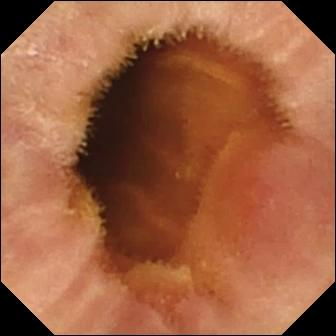

In [13]:
Image.open(os.path.join(_DATA_PATH, df_full['path'].iloc[0]))

In [14]:
cv2.imread(os.path.join(_DATA_PATH, df_full['path'].iloc[100])).shape

(336, 336, 3)

In [15]:
df_train, df_valid = train_test_split(df_full, test_size = 0.2, random_state = 42)
df_train['is_valid'] = False
df_valid['is_valid'] = True
df_ = pd.concat([df_train,df_valid], axis=0)
df_

C:\Users\Admin\anaconda3\envs\cls\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\anaconda3\envs\cls\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,filename,label,path,target,is_valid
2935,8885668afb844852_20766.jpg,Normal,Normal clean mucosa/8885668afb844852_20766.jpg,7,False
7721,5e59c7fdb16c4228_9589.jpg,Normal,Normal clean mucosa/5e59c7fdb16c4228_9589.jpg,7,False
12431,48579eec79784294_13381.jpg,Normal,Normal clean mucosa/48579eec79784294_13381.jpg,7,False
4702,6cb700585c4f4070_14848.jpg,Normal,Normal clean mucosa/6cb700585c4f4070_14848.jpg,7,False
3948,7a47e8eacea04e64_52280.jpg,Ulcer,Ulcer/7a47e8eacea04e64_52280.jpg,10,False
...,...,...,...,...,...
12585,4560e83f9afc4685_901.jpg,Pylorus,Pylorus/4560e83f9afc4685_901.jpg,8,True
7683,5e59c7fdb16c4228_9627.jpg,Normal,Normal clean mucosa/5e59c7fdb16c4228_9627.jpg,7,True
13904,3c8d5f0b90d7475d_3594.jpg,Normal,Normal clean mucosa/3c8d5f0b90d7475d_3594.jpg,7,True
15567,3ada4222967f421d_2630.jpg,Foreign Bodies,Foreign body/3ada4222967f421d_2630.jpg,4,True


In [16]:
df_.to_csv(os.path.join(_RES_PATH, 'fold_0.csv'), index=False, header=True)

In [17]:
df_train

,filename,label,path,target,is_valid
2935,8885668afb844852_20766.jpg,Normal,Normal clean mucosa/8885668afb844852_20766.jpg,7,False
7721,5e59c7fdb16c4228_9589.jpg,Normal,Normal clean mucosa/5e59c7fdb16c4228_9589.jpg,7,False
12431,48579eec79784294_13381.jpg,Normal,Normal clean mucosa/48579eec79784294_13381.jpg,7,False
4702,6cb700585c4f4070_14848.jpg,Normal,Normal clean mucosa/6cb700585c4f4070_14848.jpg,7,False
3948,7a47e8eacea04e64_52280.jpg,Ulcer,Ulcer/7a47e8eacea04e64_52280.jpg,10,False
...,...,...,...,...,...
11964,48579eec79784294_26432.jpg,Reduced Mucosal View,Reduced mucosal view/48579eec79784294_26432.jpg,9,False
21575,0531325b64674948_10193.jpg,Normal,Normal clean mucosa/0531325b64674948_10193.jpg,7,False
5390,64440803f87b4843_7694.jpg,Normal,Normal clean mucosa/64440803f87b4843_7694.jpg,7,False
860,89cdd41258c542c5_4229.jpg,Normal,Normal clean mucosa/89cdd41258c542c5_4229.jpg,7,False


In [ ]:
# from tqdm import tqdm
# df_train['path'] = [os.path.join(_DATA_PATH,item) for item in list(df_train['path'])]

# for idx in tqdm(range(len(df_train))):
#     if not os.path.isfile(df_train['path'].iloc[idx]):
#         print(idx)